## Importing the libraries

As for this project I will be using machine learning models, I have installed the required libraries from keras, pandas, sklearn, matplolib, etc.

In [2]:
!pip install seaborn

     |████████████████████████████████| 292 kB 2.6 MB/s eta 0:00:01     |██████████████████████████▉     | 245 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 43.4 MB 112 kB/s  eta 0:00:01


In [4]:
!pip install sklearn

     |████████████████████████████████| 31.2 MB 5.6 MB/s eta 0:00:01    |████████▋                       | 8.4 MB 2.3 MB/s eta 0:00:11
     |████████████████████████████████| 306 kB 16.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=2d6bf794d1e6218954b2f7113316a3b3618d7c0624274ec511d8f81a6dfe2eaa
  Stored in directory: /home/lasta/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [136]:
!pip install lightgbm

     |████████████████████████████████| 2.0 MB 1.3 MB/s eta 0:00:01


In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.metrics import mean_squared_error
from math import sqrt


## Data Representation

The data sets are represented in two sets train and test datasets. Both of the datasets contain 76 number of attributes with houseIDs and other properties of the house. With the help of Pandas library we are loading the .cvs files into dataframes for further data processing.


In [191]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [192]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [193]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [194]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [195]:
df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


As we can see this dataset contains NaN, which is also known as missing values in the datasets. For the further processing and use of machine learning models, we need to make a list of missing values and the attributes containing it. Finding the percentage of NaN in the datasets and any attributes/ columns having NaN/ missing values more than 20% can be removed, as such datasets are not very reliable. If the attributes have less than 20% missing values, then replace them with the mean value of the column.

In [212]:
def missing_values(df):
    NaN_column= []
    for i in df.columns:
        if df[i].isnull().sum()>1 :
            NaN_column.append(i)
    
    NaN_found= df.isnull().sum()/df.shape[0]*100
    remove_column= NaN_found[NaN_found>20].keys()
    df.drop(columns=remove_column, inplace= True)
    values= df.select_dtypes(include=['float64','int64'])
    NaN_values=[]
    for j in values:
        if values[j].isnull().sum()>0 :
            NaN_values.append(j)
    df.fillna(values.mean(),inplace= True)
    df.fillna(method= 'ffill', inplace= True)
    

In [213]:
missing_values(df_train)

In [214]:
missing_values(df_test)

In [199]:
df_train.shape
    

(1460, 76)

In [200]:
df_test.shape

(1459, 75)

In [201]:
#To check if it contains any NaN values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [202]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

We have removed all the missing values or replaced them with a mean value.

There are integer, floar and string as their data-type in this dataframe, for further analysis we need to convert them into numerical (float or integer) value.

## Numeric data visualization

In [203]:
import itertools

In [204]:
def visualize_bar(df):
    numeric_column= df.select_dtypes(include=['int64','float64'])
    drop_ID_SalePrice= numeric_column.drop(['Id','SalePrice'],axis=1)
    for i in drop_ID_SalePrice:
        plt.bar(df[i],df['SalePrice'],color="orange")
        plt.xlabel(i)
        plt.ylabel("Sales Price")
        plt.title("Sales Price Vs."+i)
        plt.show()   

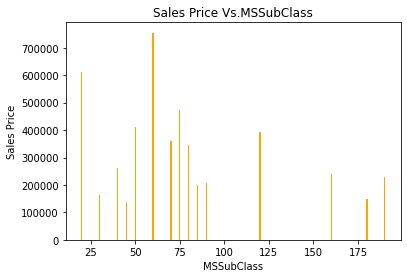

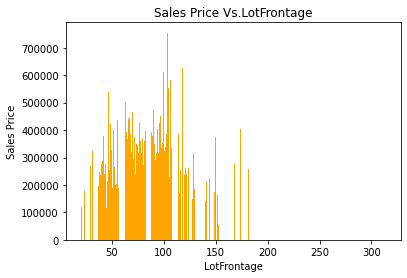

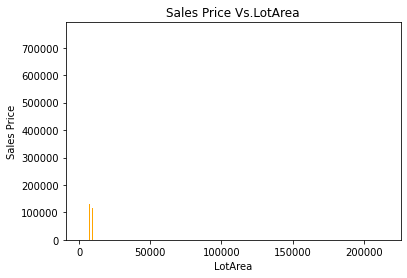

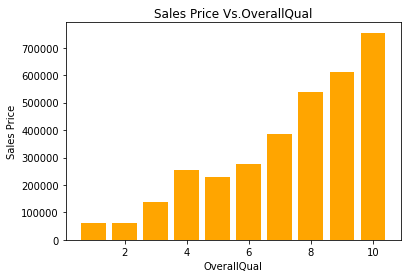

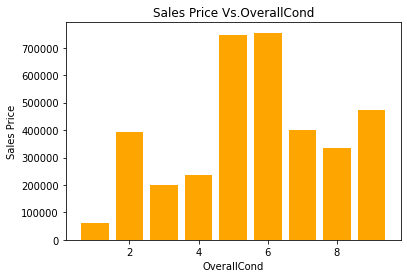

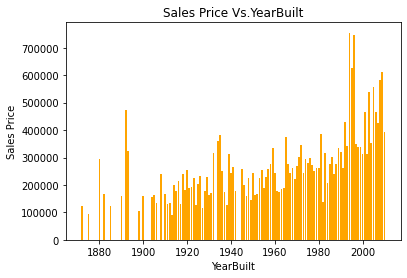

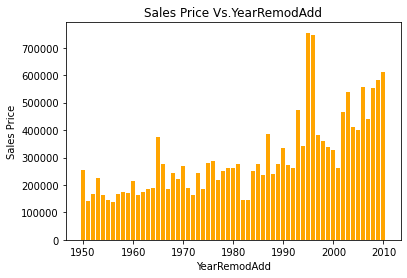

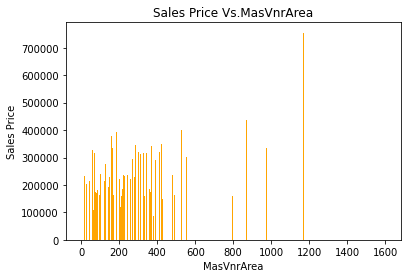

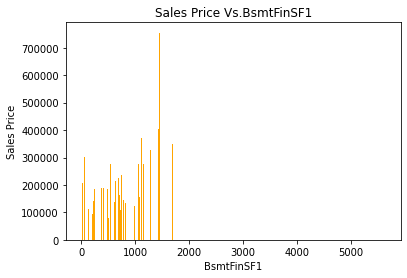

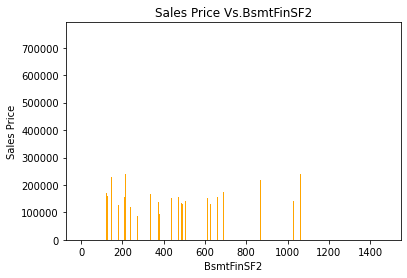

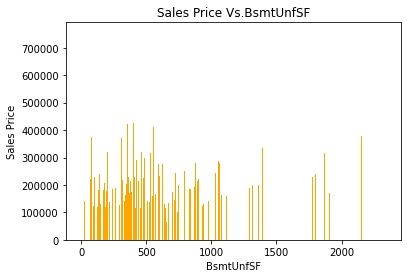

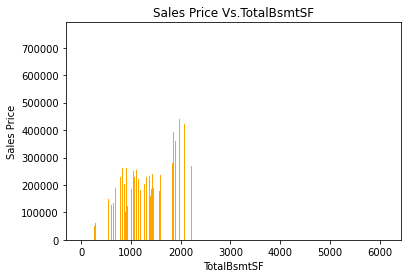

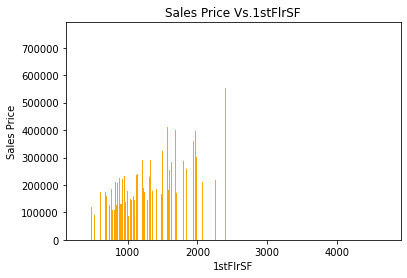

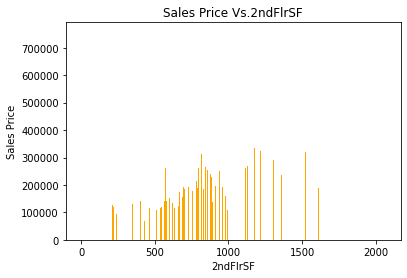

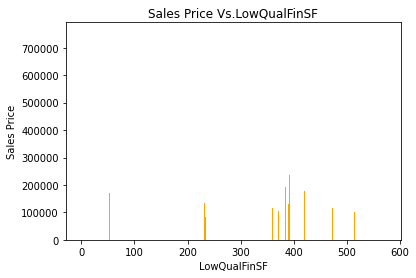

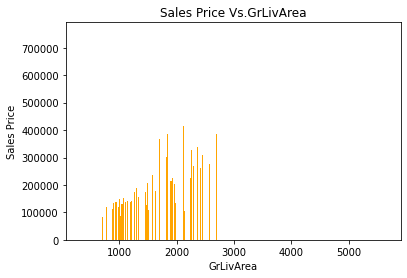

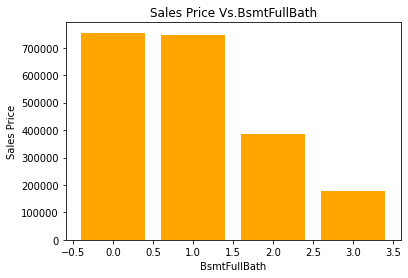

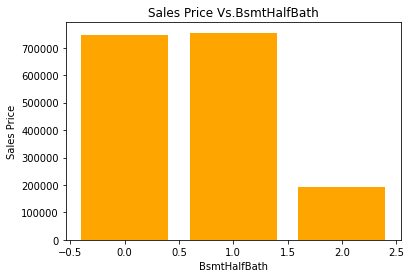

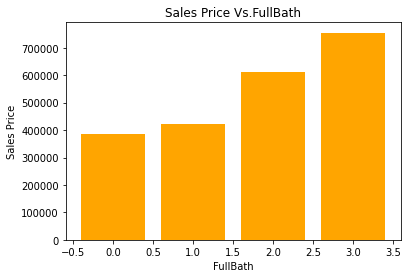

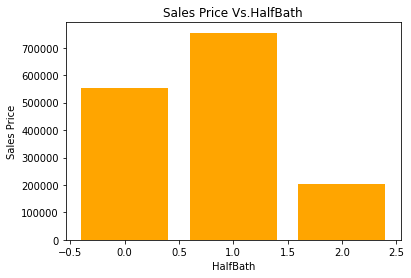

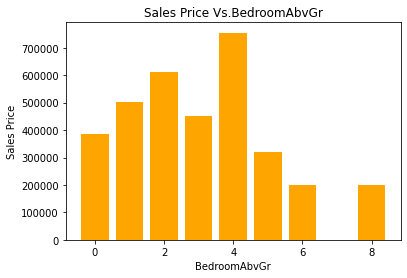

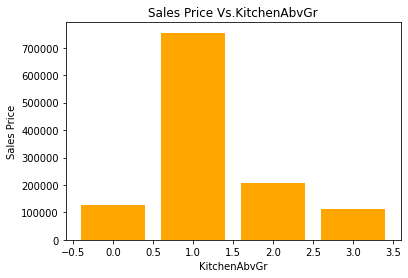

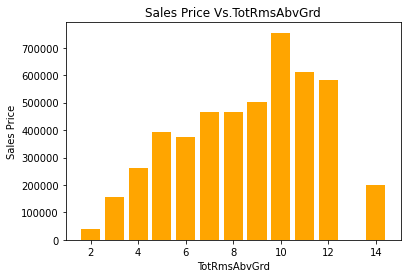

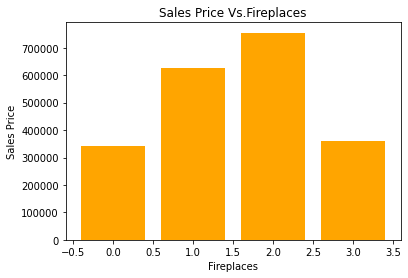

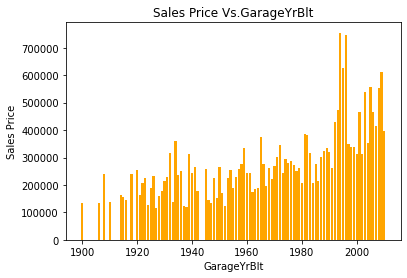

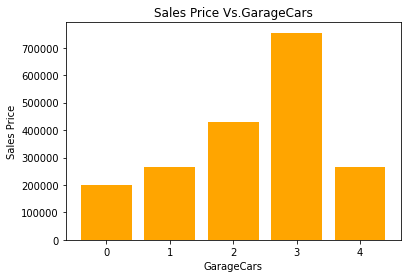

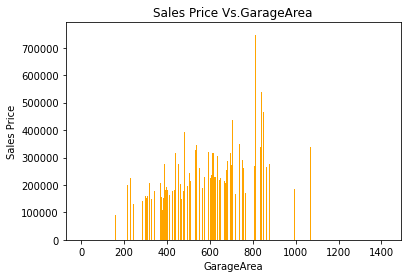

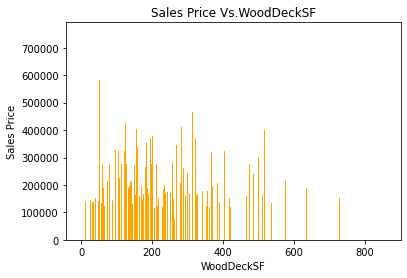

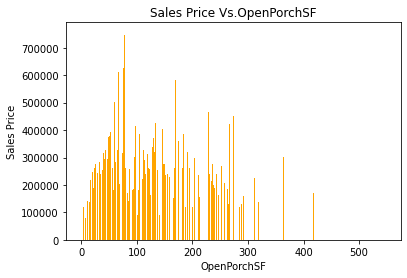

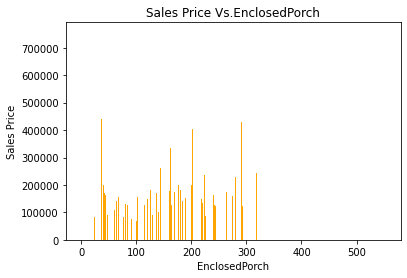

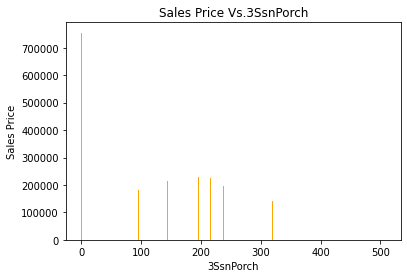

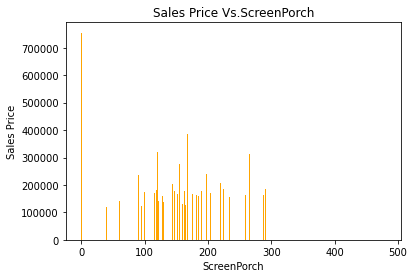

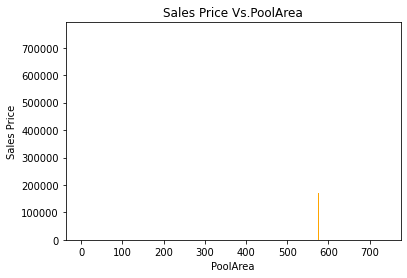

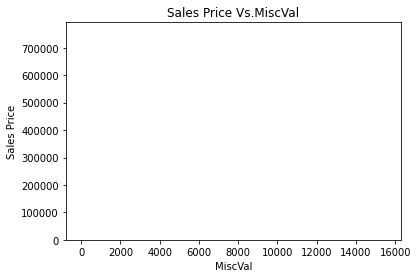

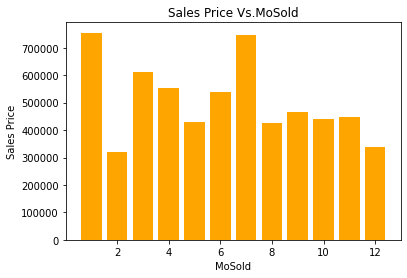

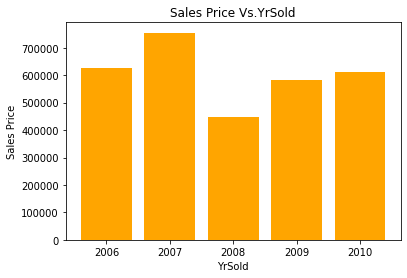

In [205]:
visualize_bar(df_train)

In [206]:
def visualize_scatter(df):
    numeric_column= df.select_dtypes(include=['int64','float64'])
    category_column= df.select_dtypes(include=['object'])
    drop_ID_SalePrice= numeric_column.drop(['Id','SalePrice'],axis=1)
    for i in drop_ID_SalePrice:
        sns.scatterplot(data= df, y='SalePrice',x= i)
        
        
        #plt.scatter(df[i],df['SalePrice'],color="green")
        #plt.xlabel(i)
        #plt.ylabel("Sales Price")
        plt.title("Sales Price Vs."+i)
        plt.show() 
    for j in category_column:
        sns.barplot(x=j, y='SalePrice',data=df)
        plt.title("Sales Price Vs."+j)
    

In [126]:
category_column= df_train.select_dtypes(include=['object'])
for k in category_column:
        label= LabelEncoder()
        df_train[k]=label.fit_transform(df_train[k])
        df_test[k]=label.fit_transform(df_test[k])

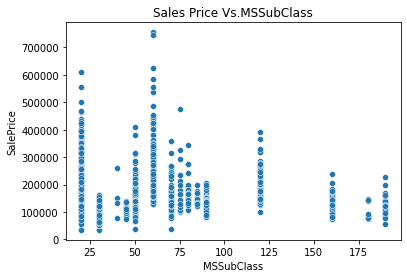

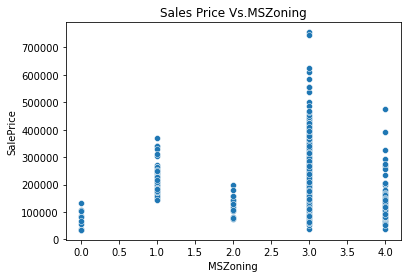

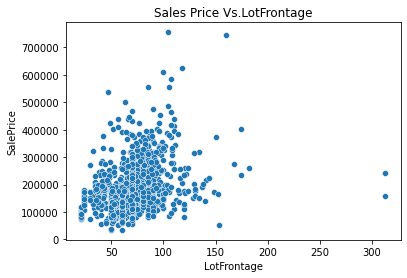

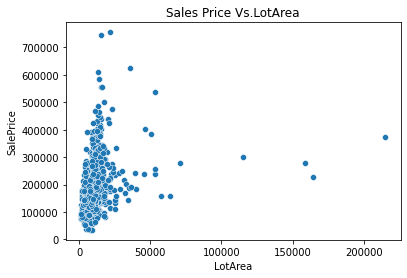

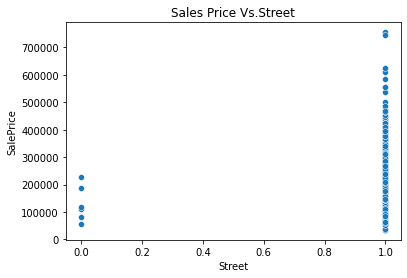

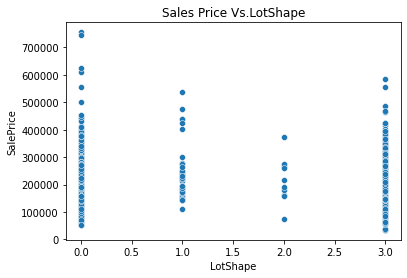

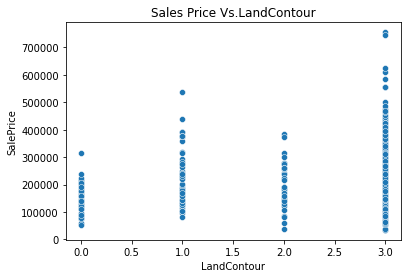

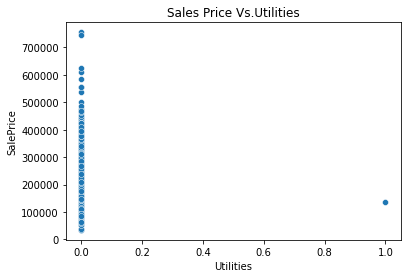

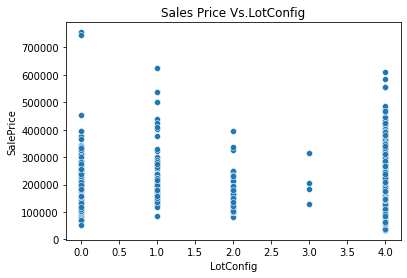

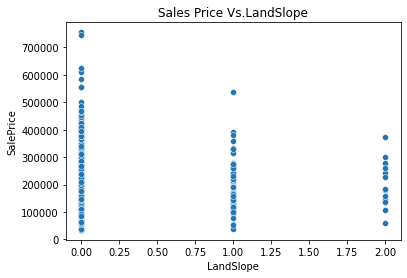

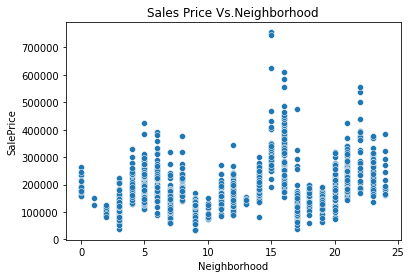

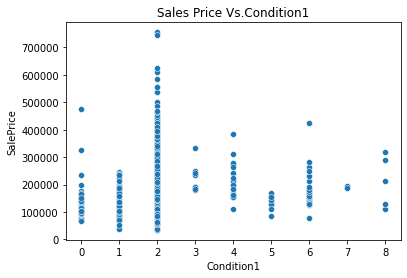

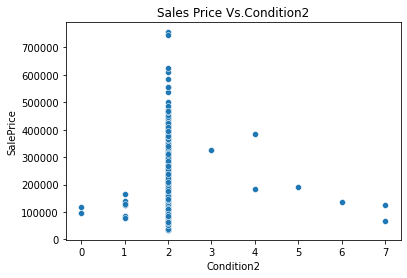

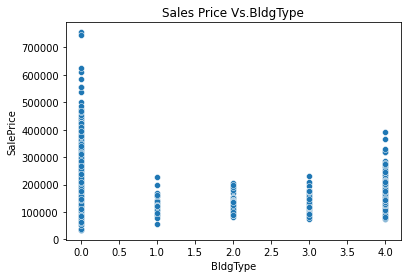

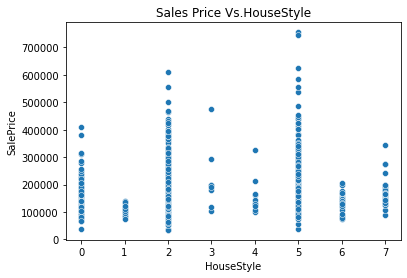

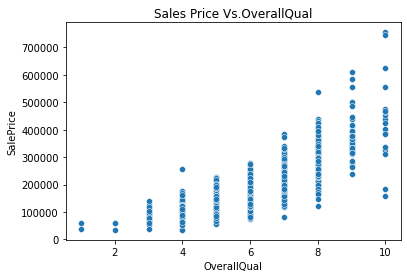

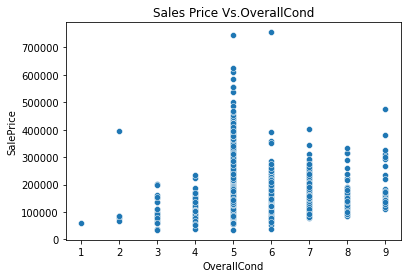

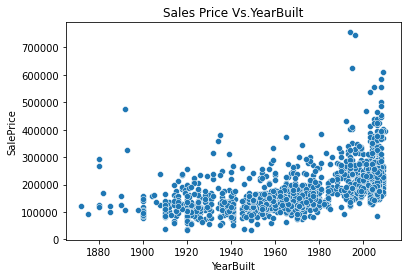

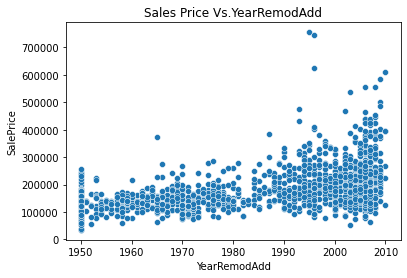

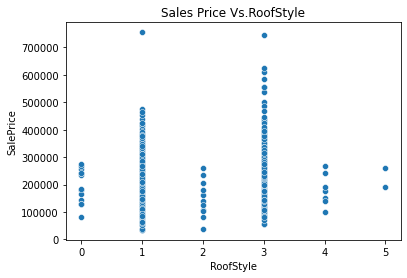

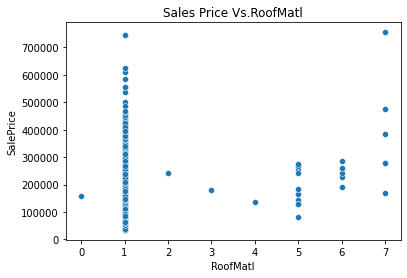

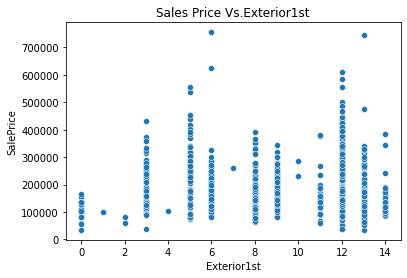

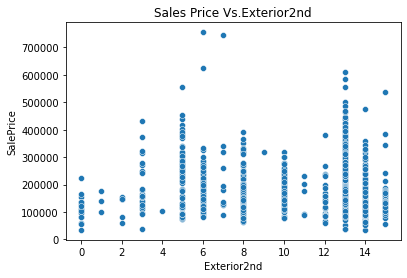

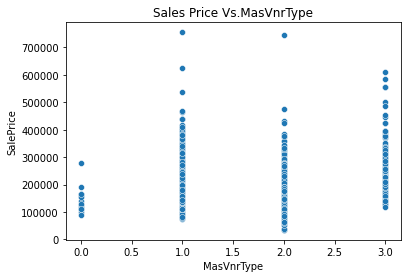

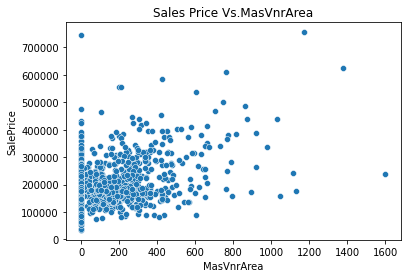

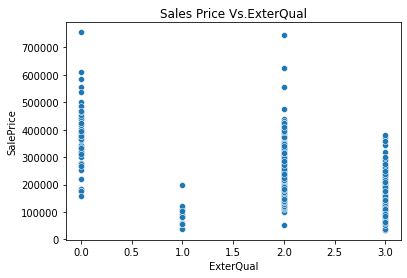

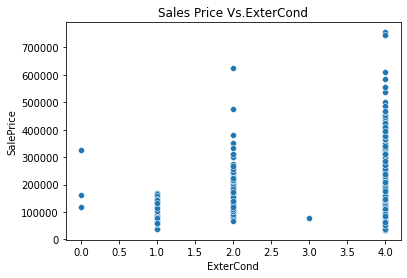

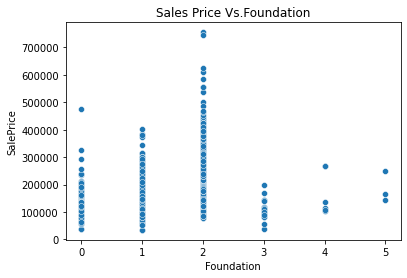

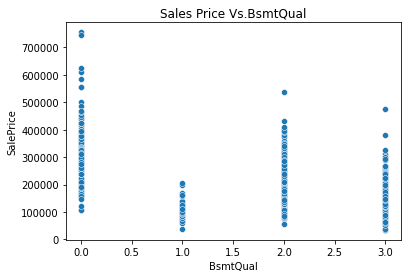

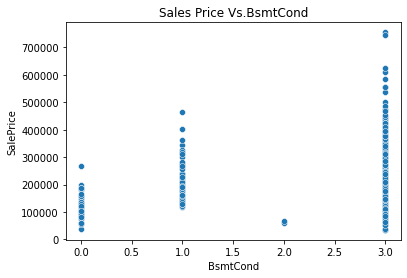

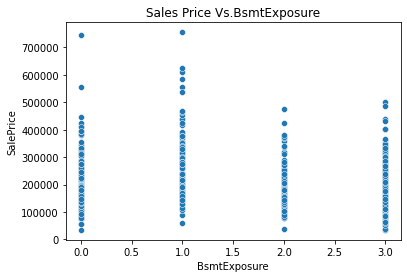

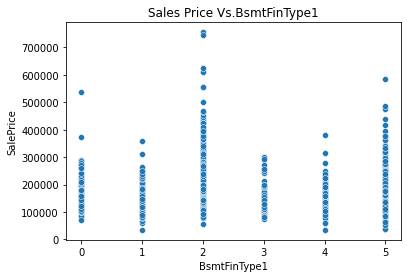

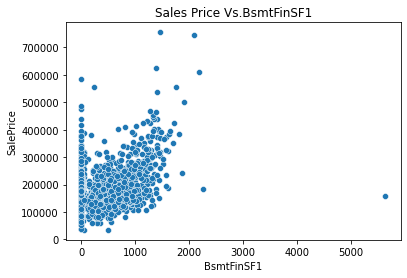

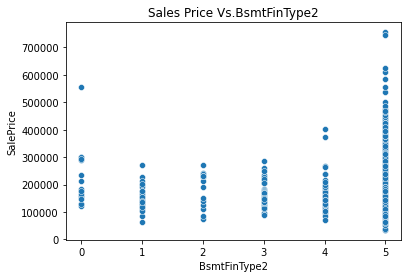

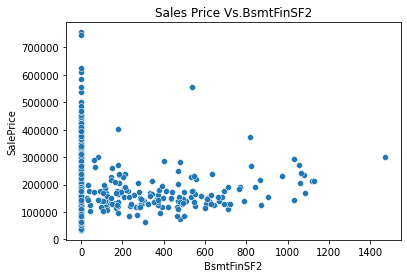

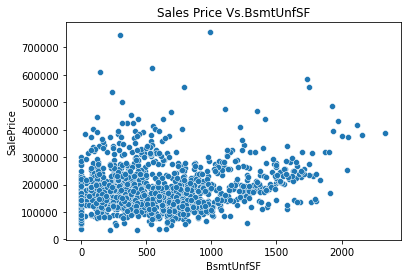

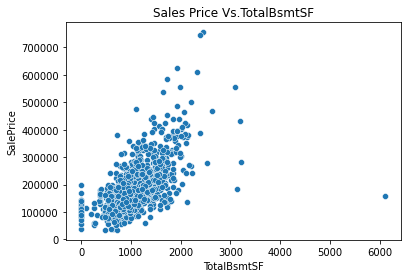

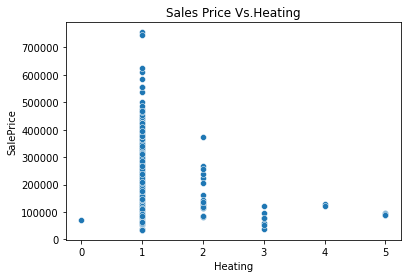

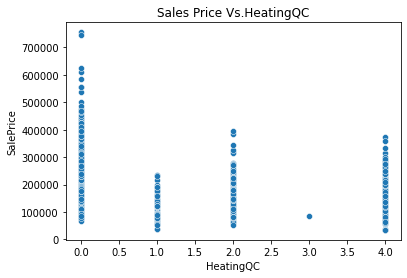

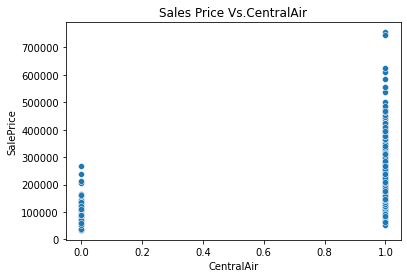

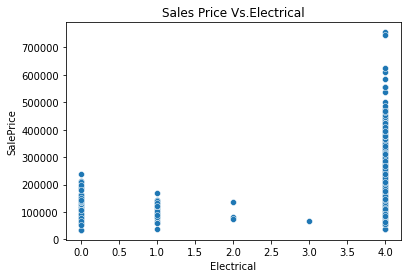

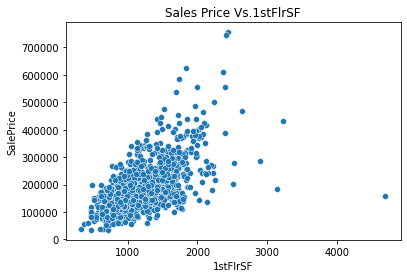

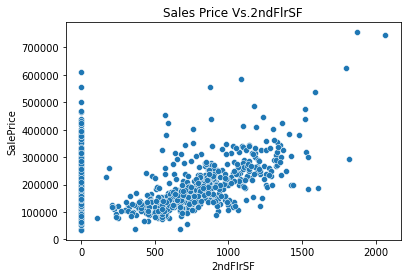

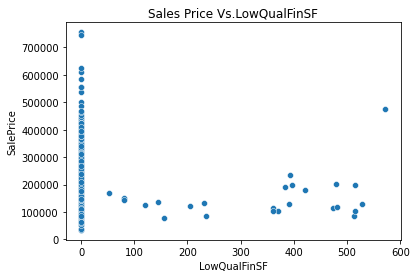

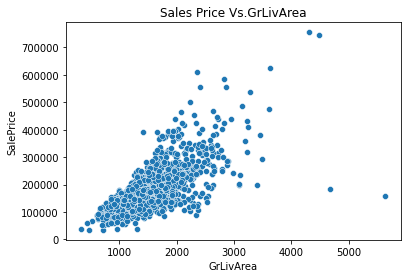

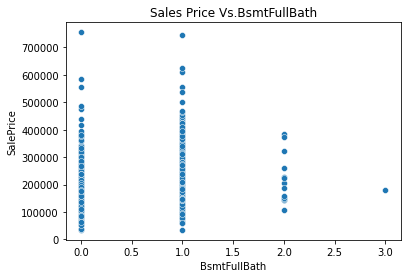

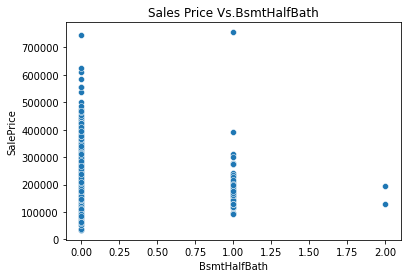

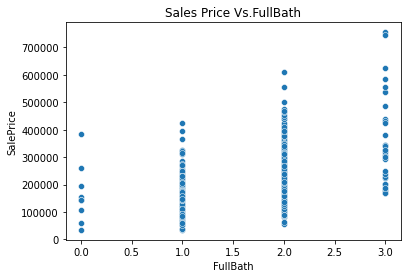

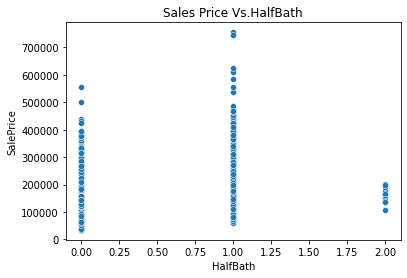

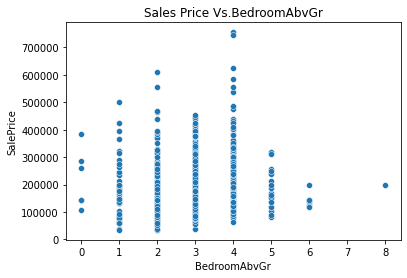

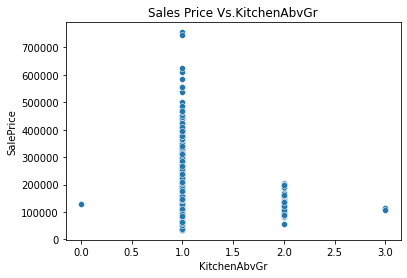

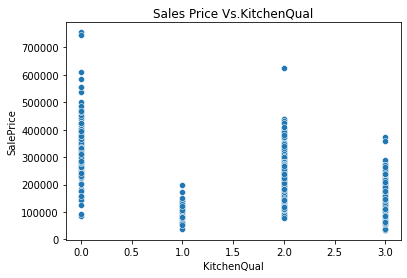

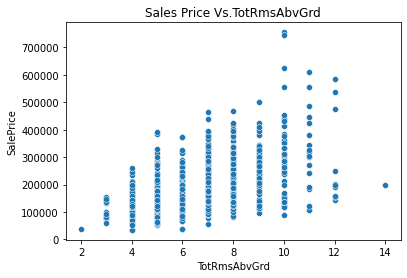

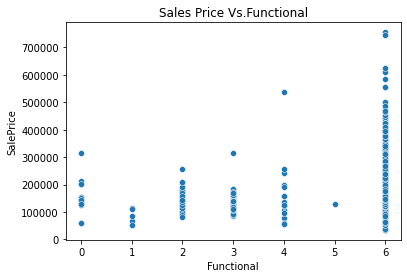

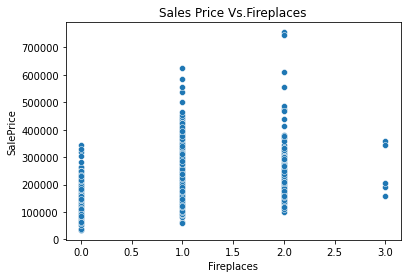

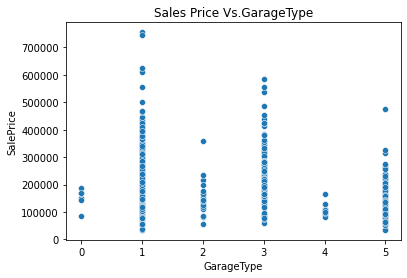

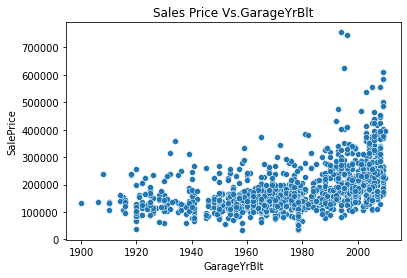

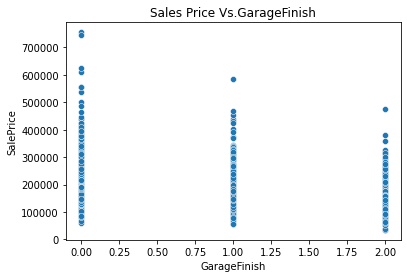

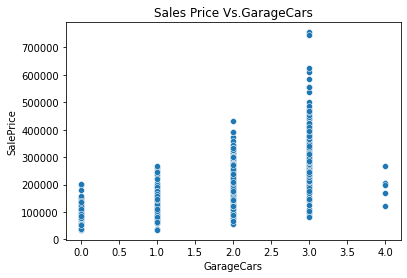

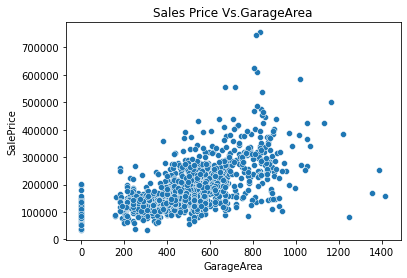

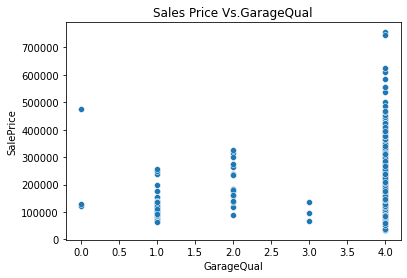

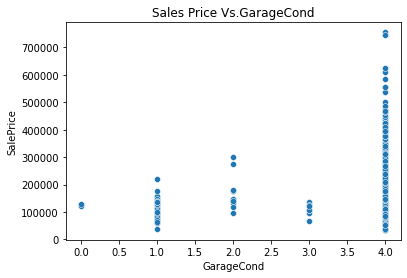

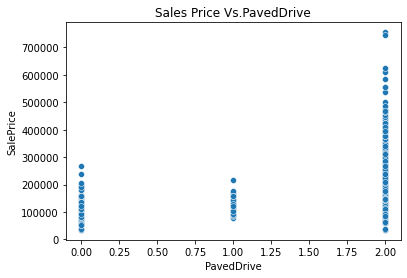

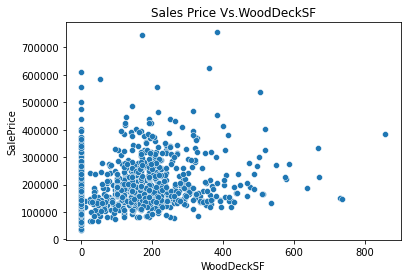

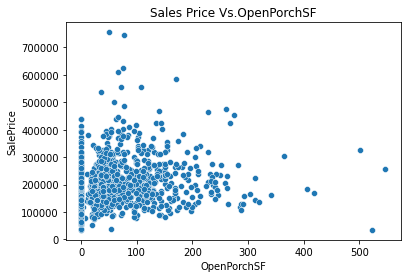

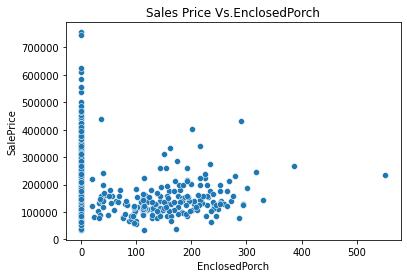

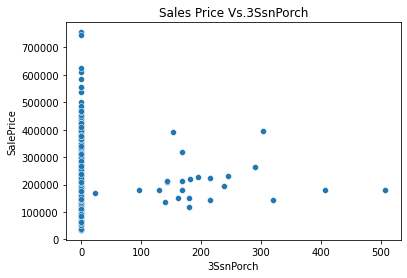

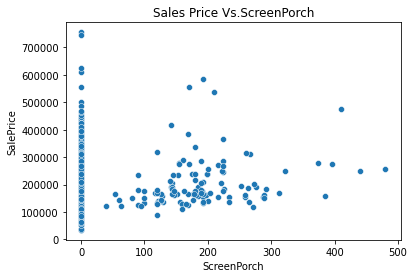

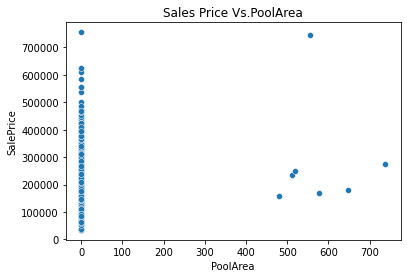

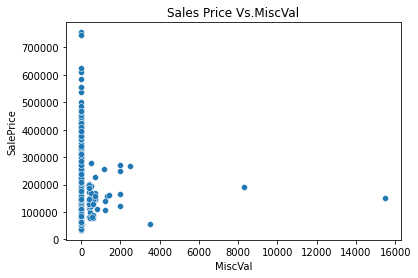

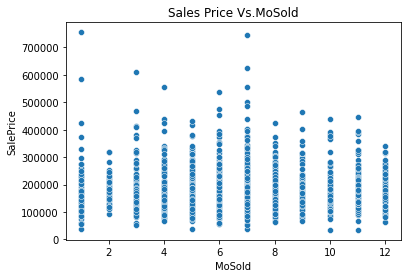

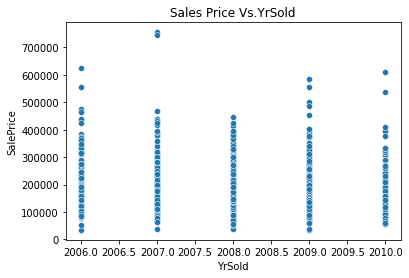

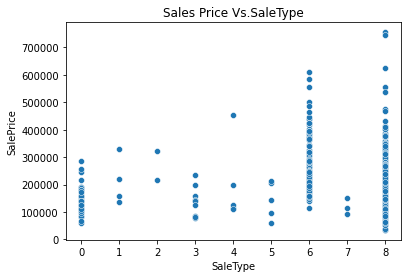

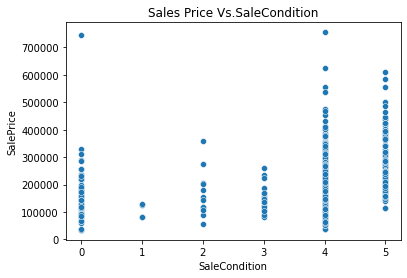

In [127]:
visualize_scatter(df_train)

In [207]:
def heat_map(df):
    plt.figure(figsize=(20,20))
    sns.heatmap(df.corr())

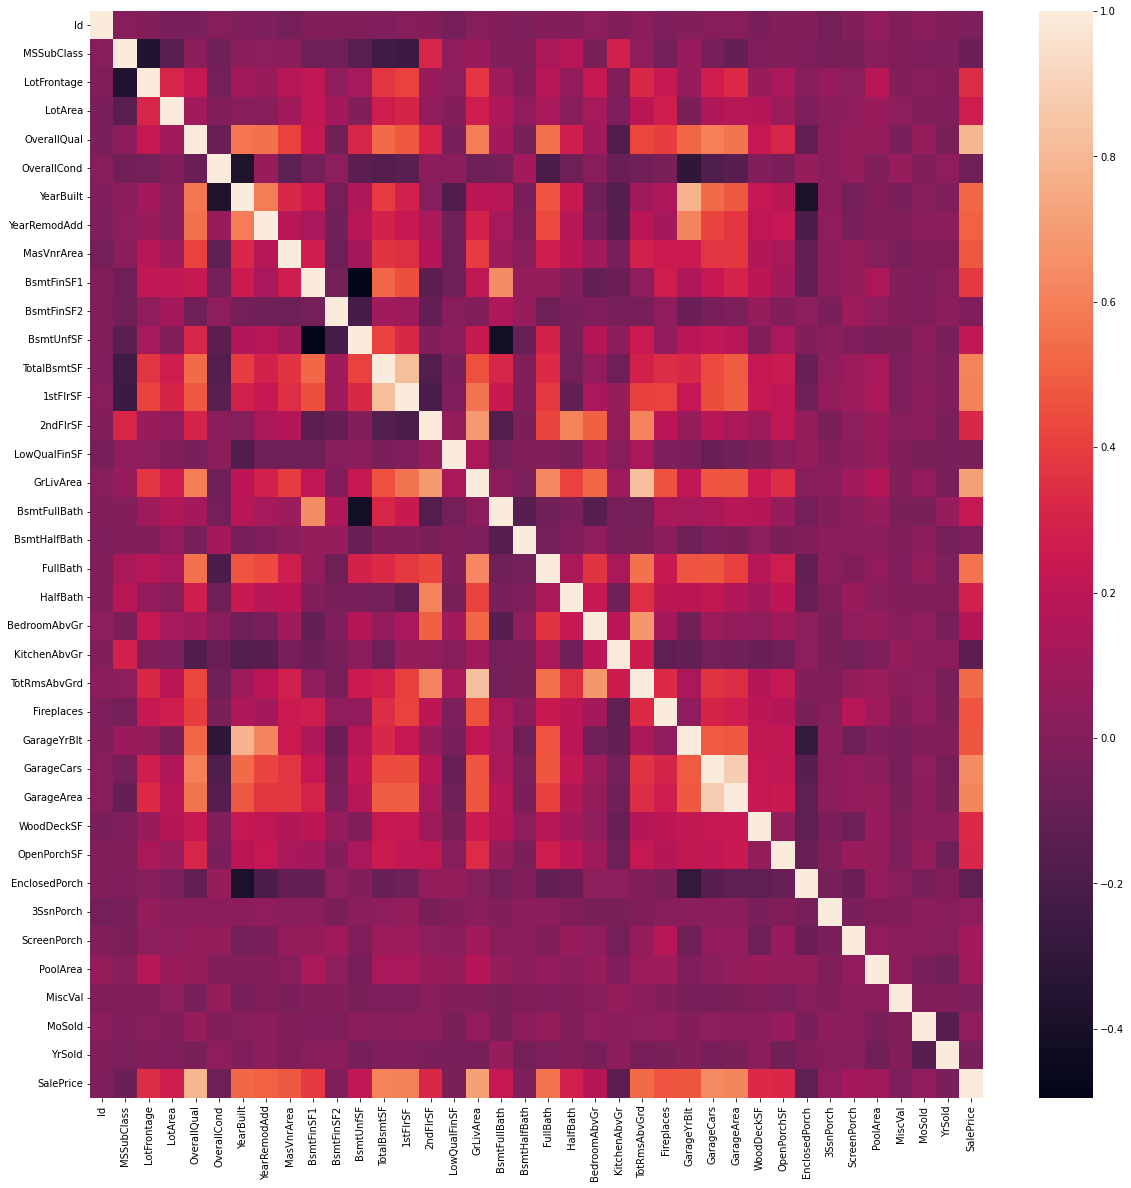

In [208]:
heat_map(df_train)

# Random Forest Model

In [130]:
x_train=df_train.drop(columns='SalePrice')
y_train= df_train['SalePrice']
x_test= df_test


In [159]:
model_randomForest= RandomForestRegressor(random_state= 50)
train_randomForest= model_randomForest.fit(x_train,y_train)
prediction_sales= model_randomForest.predict(x_test)
score_RFM= model_randomForest.score(x_train,y_train)
print(score_RFM)

0.9819823151253528


In [132]:
prediction_sales

array([128807.08, 155216.82, 178762.82, ..., 150173.87, 113870.  ,
       232742.23])

# Linear Regression Model

In [160]:
model_linearRegression= LinearRegression()
train_linearRegression= model_linearRegression.fit(x_train,y_train)
prediction_sales_LRM= model_linearRegression.predict(x_test)
score_LRM= model_linearRegression.score(x_train,y_train)
print(score_LRM)

0.8492749179916198


In [134]:
prediction_sales_LRM

array([103535.20354344, 146170.01462553, 166538.82474723, ...,
       142872.83974275, 111396.10074128, 241153.43615864])

In [153]:
type(prediction_sales_LRM)

list

# Light Gradient Boosting Regressor

In [161]:
model_lgbRegressor= LGBMRegressor(verbose=1, objective='regression',random_state=50)
train_lgbRegressor= model_lgbRegressor.fit(x_train,y_train)
prediction_sales_LGBR= model_lgbRegressor.predict(x_test)
score_LGBR= model_lgbRegressor.score(x_train,y_train)
print(score_LGBR)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3619
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 71
[LightGBM] [Info] Start training from score 180921.195890
0.981755679671501


In [139]:
prediction_sales_LGBR

array([125806.31402551, 154741.75968407, 177263.65626616, ...,
       174963.07926095, 111834.40262914, 213373.34128181])

In [158]:
predict_dict= {'Random Forest Prediction':prediction_sales,'Linear Regression Prediction':prediction_sales_LRM,'Light Gradient Boosting Prediction':prediction_sales_LGBR     }
df_predict= pd.DataFrame.from_dict(predict_dict)
df_predict

,Random Forest Prediction,Linear Regression Prediction,Light Gradient Boosting Prediction
0,128807.08,103535.203543,125806.314026
1,155216.82,146170.014626,154741.759684
2,178762.82,166538.824747,177263.656266
3,183465.17,181241.669364,180232.675807
4,197330.58,185677.040254,190601.344301
...,...,...,...
1454,83772.08,63667.409712,81146.623045
1455,86523.00,55980.294803,84739.707002
1456,150173.87,142872.839743,174963.079261
1457,113870.00,111396.100741,111834.402629


# Machine Learning Models Comparison

Using 3 different Machine learning models, the house prices were predicted for each of them, to test for the accuracy of the models, we tried to look for their accuracy score. Here we are comparing the house prices predicted by each of the models. 

In [209]:
def plot_graph(predictions_1,prediction_2, prediction_3):
    plt.figure(figsize=(15,8))
    plt.plot(predictions_1,color='indianred', label="Price prediction using Random Forest Model" )
    plt.plot(prediction_2,color='khaki', label="Price prediction using Linear Regression Model")
    plt.plot(prediction_3,color='skyblue', label="Price prediction using Light Gradient Boosting Regressor Model")
    plt.legend()
    plt.ylabel('Price')
    plt.xlabel('House Number' )
    plt.title ("House prediction using Machine learning Models")
    plt.show()

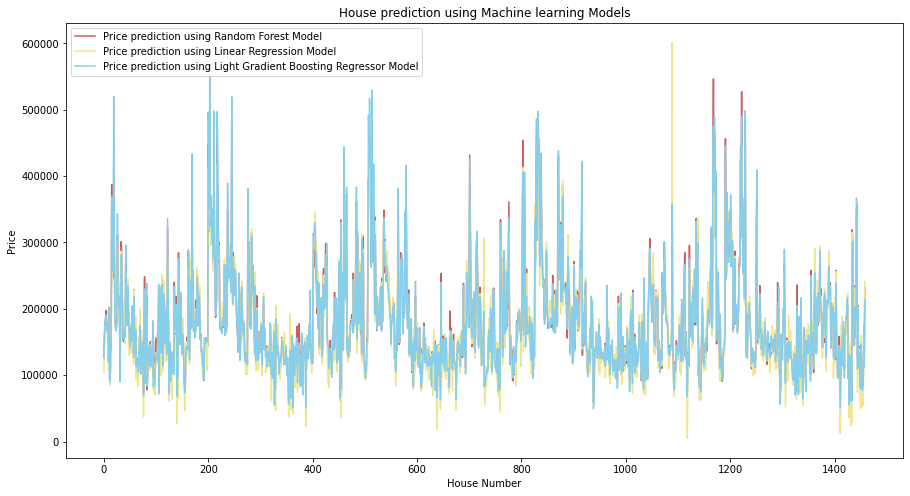

In [211]:
plot_graph(prediction_sales,prediction_sales_LRM, prediction_sales_LGBR)

In [185]:
def model_accuracy_bar(score1, score2, score3):
    models=['Random Forest','Linear Regression','Light Gradient Boosting Regressor']
    score=[score1, score2, score3]
    plt.bar(models,score)
    plt.title("Machine Learning Models Score comparison")
    plt.xlabel("Machine Learning Model")
    plt.ylabel("Scores")
    plt.show()

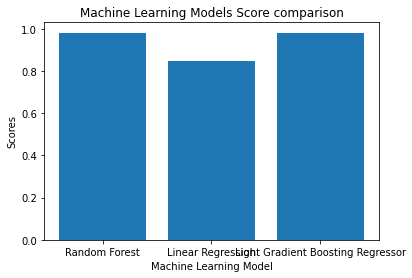

In [186]:
model_accuracy_bar(score_RFM, score_LRM, score_LGBR)

# Conclusion

With the above data analysis, and accuracy score we can tell that Random Forest has the highest accuracy score being 98.198%, and this is the most reliable one among the 3 models used to predict regression price of the houses.